# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [1]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name=r".\ENVs\Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [4]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [5]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

# Tennis (Multi-agent Problem)¶

Use this notebook to train and/or test your agent for the Tennis environment. Follow the instructions below to get started!

## 1. Start the Environment
Run the next code cell to install a few packages. This line will take a few minutes to run!

In [1]:
!pip -q install ./python
!pip -q install tqdm

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.

Please select one of the two options below for loading the environment.

## 2. Loading the Environment for Training¶
It automatically detects the platform and assigns the right file to the UnityEnvironment. The assumption is that the computer is 64 bit.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import platform

platform_files = {"Windows":r".\ENVs\Tennis_Windows_x86_64\Tennis.exe",
                 "Linux":r"./ENVs/Tennis_Linux/Tennis.x86_64",
                 "Darwin":r"./ENVs/Tennis.app"}
file = platform_files[platform.system()]
env = UnityEnvironment(file_name=file , no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## 3. Initializing our agent with environment parameters:

In [2]:
from src.agent import Agent
from collections import deque

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of actions
action_size = brain.vector_action_space_size

# Init the state space and finding its size
state = env_info.vector_observations[0]
state_size = len(state)
num_agents = len(env_info.agents)

# Here we initialize two agents
# We set the states size to 48 (24*2), so we can feed each agent boths agent's state observations.
agent_1 = Agent(state_size=48, action_size=action_size, num_agents=1, random_seed=0)
agent_2 = Agent(state_size=48, action_size=action_size, num_agents=1, random_seed=0)

## 4. Training our Tennis Agents for 1000 Episodes

In [ ]:
from src.train import train_multiagent
episode_scores, average_scores = train_multiagent(agent_1, agent_2, env, num_agents, n_episodes=10000)

Episode 1516 | Avg Score: 0.02:  15%|██████▌                                    | 1517/10000 [12:56<1:46:27,  1.33it/s]

## 5. Plotting the Scores

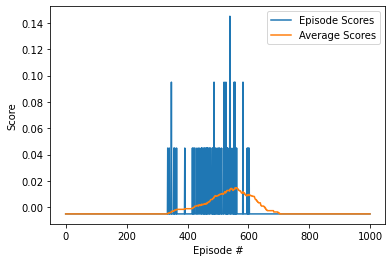

In [4]:
# plot the scores
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(episode_scores)), episode_scores)
plt.plot(np.arange(len(average_scores)), average_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(["Episode Scores", "Average Scores"])
plt.show()

In [3]:
env.close()

## 6. Watch a smart Agent
If you trained the agent or you just want to see a trained agent behavior, restart the notebook and run the section below.

In [ ]:
from unityagents import UnityEnvironment
import numpy as np
import platform
from src.agent import Agent
from collections import deque

platform_files = {"Windows":r".\ENVs\Reacher_Windows_x86_64\Reacher.exe",
                 "Linux":r"./ENVs/Reacher_Linux/Reacher_Linux/Reacher.x86_64",
                 "Darwin":r"./ENVs/Reacher.app"}
file = platform_files[platform.system()]
env = UnityEnvironment(file_name=file) #, no_graphics=True)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of actions
action_size = brain.vector_action_space_size

# Init the state space and finding its size
state = env_info.vector_observations[0]
state_size = len(state)
num_agents = len(env_info.agents)

agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)
agent.load_brain()

for _ in range(1):
    # reset the unity environment
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    # reset the agent for the new episode
    agent.reset()
    agent_scores = np.zeros(num_agents)
    while True:
        # determine actions for the unity agents from current sate
        actions = agent.act(states)

        # send the actions to the unity agents in the environment and receive resultant environment information
        env_info = env.step(actions)[brain_name]

        next_states = env_info.vector_observations  # get the next states for each unity agent in the environment
        rewards = env_info.rewards  # get the rewards for each unity agent in the environment
        dones = env_info.local_done  # see if episode has finished for each unity agent in the environment

        # set new states to current states for determining next actions
        states = next_states

        # Update episode score for each unity agent
        agent_scores += rewards

        # If any unity agent indicates that the episode is done,
        # then exit episode loop, to begin new episode
        if np.any(dones):
            break
    print(f"Agents average score: {agent_scores.mean():.2f}")
env.close()